In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [6]:
data = pd.read_csv("C:\\Users\\mrboo.INDRA\\Placement_Data_Full_Class.csv")
print(data)
print(data['salary'].unique())

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR 

In [7]:
#print(data['specialisation'].unique())
#mapeo de los datos
data['hsc_b']= data['hsc_b'].map( {'Others': 0, 'Central': 1} ).astype(int)
data['gender']= data['gender'].map( {'M': 0, 'F': 1} ).astype(int)
data['ssc_b']= data['ssc_b'].map( {'Others': 0, 'Central': 1} ).astype(int)
data['hsc_s']= data['hsc_s'].map( {'Commerce': 0, 'Science': 1, 'Arts': 2} ).astype(int)
data['degree_t']= data['degree_t'].map( {'Sci&Tech': 0, 'Comm&Mgmt': 1, 'Others': 2} ).astype(int)
data['workex']= data['workex'].map( {'No': 0, 'Yes': 1} ).astype(int)
data['specialisation']= data['specialisation'].map( {'Mkt&HR': 0, 'Mkt&Fin': 1} ).astype(int)
data['status']= data['status'].map( {'Placed': 0, 'Not Placed': 1} ).astype(int)

def divisor(x):
    if x != 0:
        x = x/1000
    return x

def codificador(data, columna, codes, rango):
    for i in range(codes):
        data.loc[(data[columna] <= rango[i+1]) & (data[columna] >= rango[i]), columna] = i
    return data

data["salary"]= data["salary"].fillna(0)
data["salary"] = data["salary"].apply(divisor)
l50_to_100 = [50,60,70,80,90,100]
l14 = [30,44,58,72,86,100]

#data.loc[data['ssc_p'] <= 50, 'ssc_p'] = 4
#data = codificador(data,'ssc_p',4,l50_to_100[:5])
#data = codificador(data,'hsc_p',5,l14)
#data = codificador(data,'degree_p',5,l50_to_100)
#data = codificador(data,'etest_p',5,l50_to_100)
#data = codificador(data,'mba_p',3,l50_to_100[:4])

#status hsc_p mba_p degree_t


print(data)

     sl_no  gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0        1       0  67.00      0  91.00      0      0     58.00         0   
1        2       0  79.33      1  78.33      0      1     77.48         0   
2        3       0  65.00      1  68.00      1      2     64.00         1   
3        4       0  56.00      1  52.00      1      1     52.00         0   
4        5       0  85.80      1  73.60      1      0     73.30         1   
..     ...     ...    ...    ...    ...    ...    ...       ...       ...   
210    211       0  80.60      0  82.00      0      0     77.60         1   
211    212       0  58.00      0  60.00      0      1     72.00         0   
212    213       0  67.00      0  67.00      0      0     73.00         1   
213    214       1  74.00      0  66.00      0      0     58.00         1   
214    215       0  62.00      1  58.00      0      1     53.00         1   

     workex  etest_p  specialisation  mba_p  status  salary  
0         0  

In [18]:
data = data.drop(columns=["sl_no","gender","ssc_p","ssc_b","hsc_b","hsc_s","degree_p","workex","etest_p","specialisation"])

In [19]:
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(columns = "salary"),
                                        data['salary'],
                                        test_size=0.15,
                                        random_state = 0
                                    )

modelo = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 0
          )

modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

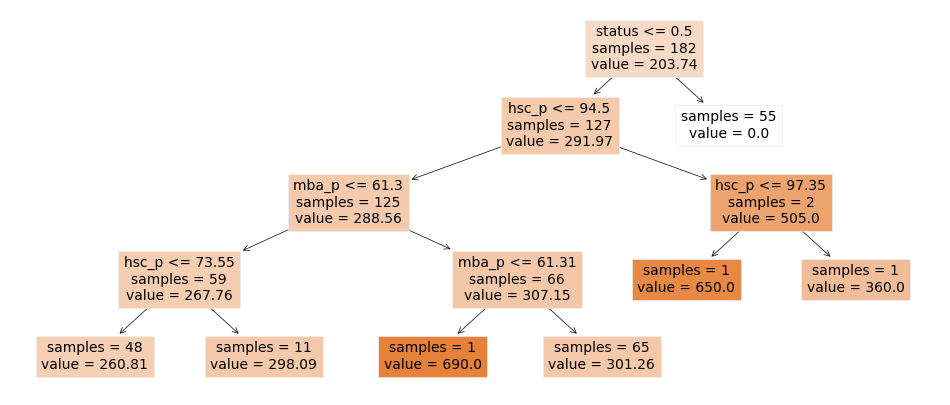

In [29]:
fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = modelo,
            feature_names = data.drop(columns = "salary").columns,
            class_names   = ['salary'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data.drop(columns = "salary").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,status,0.904892
2,mba_p,0.054532
0,hsc_p,0.040576
1,degree_t,0.000000


Text(0.5, 1.0, 'Error de validacion cruzada vs hiperparámetro ccp_alpha')

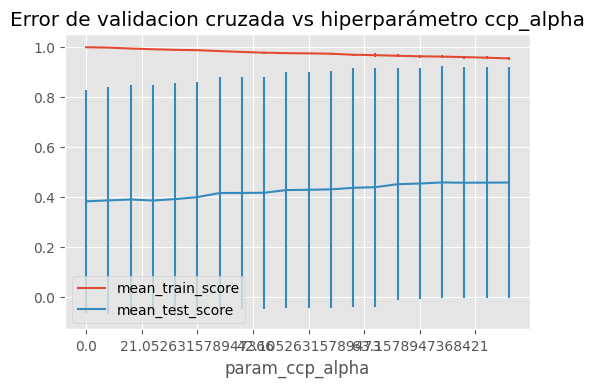

In [23]:
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 341
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )
grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha")

In [80]:
grid.best_params_

{'ccp_alpha': 0.0}

c:\Users\mrboo.INDRA\AppData\Local\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error (rmse) de test es: 44.43075108305169
[0.0, 320.0, 210.0, 0.0, 290.0, 0.0, 300.0, 225.0, 0.0, 300.0, 220.0, 400.0, 300.0, 250.0, 336.0, 260.0, 210.0, 0.0, 340.0, 0.0, 0.0, 0.0, 216.0, 0.0, 0.0, 0.0, 252.0, 200.0, 220.0, 240.0, 252.0, 0.0, 300.0]


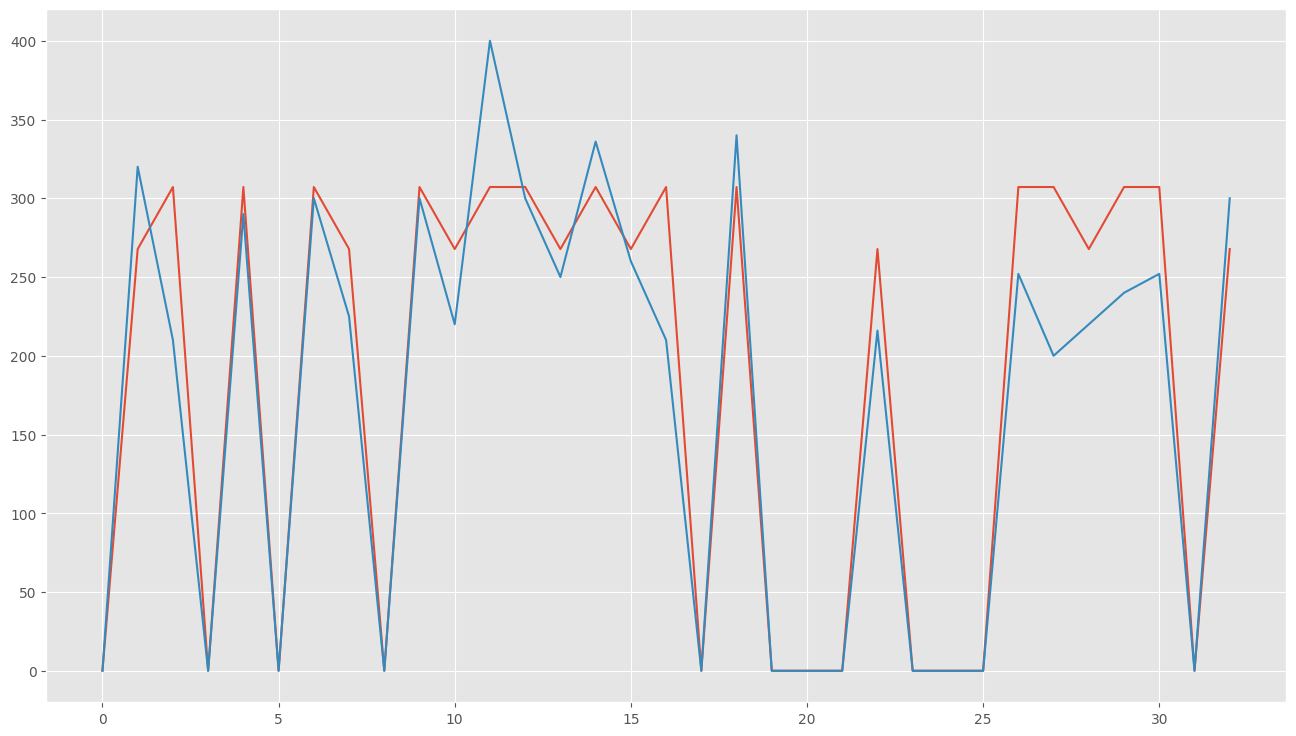

In [24]:
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

print(list(y_test))
y_test = list(y_test)
plt.plot(predicciones)
plt.plot(y_test)
plt.show()


In [98]:
diff = np.subtract(y_test, predicciones)
square = np.square(diff)
MSE = square.mean()
RMSE = np.sqrt(MSE)
print(RMSE)

41783.33613962285


In [25]:
def obtener_mejor_rmse(data):
    aux_rmse = 1000
    semilla = 0
    aux_modelo = None
    for i in range(1500):
        X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(columns = "salary"),
                                        data['salary'],
                                        test_size=0.15,
                                        random_state = i
                                    )

        modelo = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = i
            )

        modelo.fit(X_train, y_train)

        predicciones = modelo.predict(X = X_test)

        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
        )

        if rmse < aux_rmse:
            semilla = i
            aux_rmse = rmse
            aux_modelo = modelo
    
    return semilla, aux_rmse, aux_modelo

semilla, aux_rmse, aux_modelo = obtener_mejor_rmse(data)

c:\Users\mrboo.INDRA\AppData\Local\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mrboo.INDRA\AppData\Local\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mrboo.INDRA\AppData\Local\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mrboo.INDRA\AppData\Local\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\metrics\

859 25.946185566563457


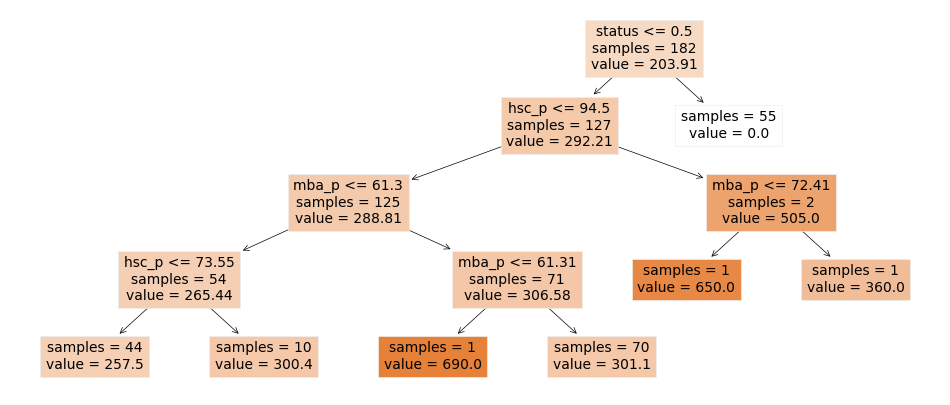

In [26]:
print(semilla, aux_rmse)
fig, ax = plt.subplots(figsize=(12, 5))
plot = plot_tree(
            decision_tree = aux_modelo,
            feature_names = data.drop(columns = "salary").columns,
            class_names   = ['salary'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [117]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop(columns = 'hsc_s'),
                                        data['hsc_s'],
                                        random_state = 123
                                    )

cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

carseats = sm.datasets.get_rdataset("Carseats", "ISLR")
datos = carseats.data
print(datos)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [70]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [66]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 19


InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got 'hsc_s' instead.

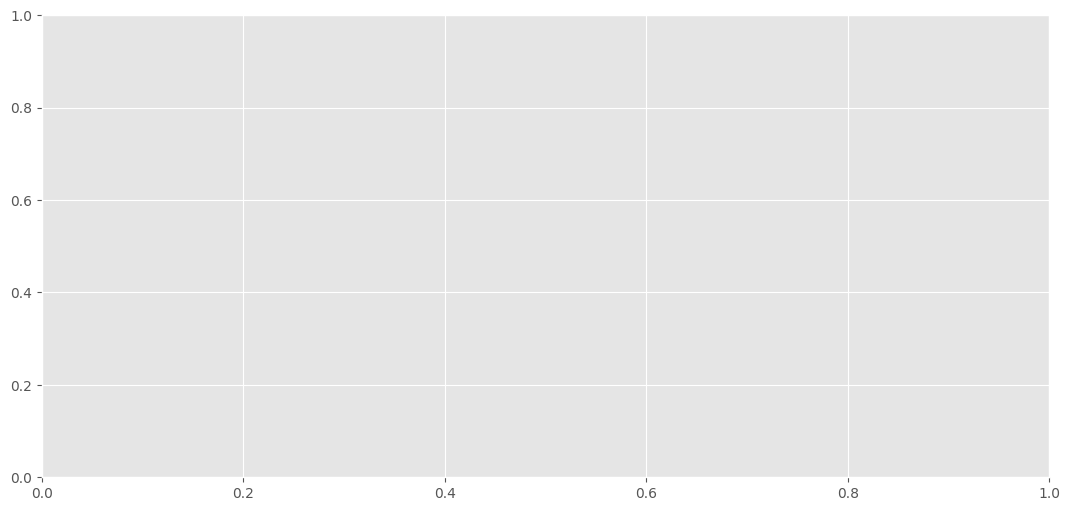

In [68]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'hsc_s',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )